# Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.

Task 1: Data Preparation

Loading the Data

• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.utils import to_categorical

In [ ]:
train_dir = "/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-4/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/Colab Notebooks/AI and Machine Learning/Week-4/Copy of devnagari digit/DevanagariHandwrittenDigitDataset/Test"

In [ ]:
def load_images(data_dir, image_size=(28, 28)):
    images = []
    labels = []
    class_names = sorted(os.listdir(data_dir))  # Get class labels from folder names
    class_map = {name: i for i, name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file in os.listdir(class_path):
                file_path = os.path.join(class_path, file)
                try:
                    image = Image.open(file_path).convert('L')  #Convert to grayscale
                    image = image.resize(image_size)
                    image_array = np.array(image) / 255.0  # Normalize
                    images.append(image_array)
                    labels.append(class_map[class_name])
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")

    return np.array(images), np.array(labels)

X_train, y_train = load_images(train_dir)
X_test, y_test = load_images(test_dir)

# Reshape and One-Hot Encoding Labels

In [ ]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


# Verify Data

Training Data Shape: (17000, 28, 28, 1), Labels: (17000, 10)
Testing Data Shape: (3000, 28, 28, 1), Labels: (3000, 10)


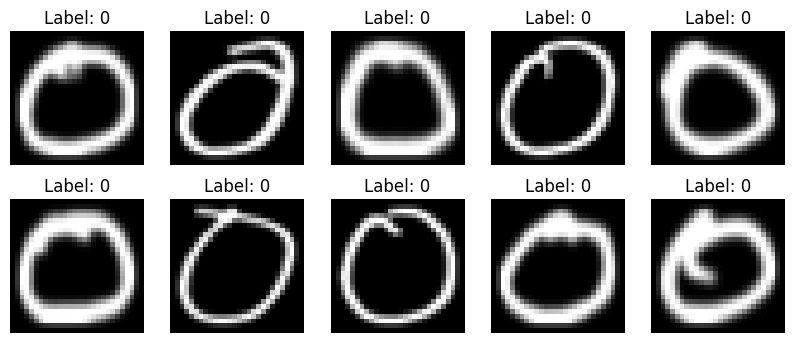

In [ ]:
print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing Data Shape: {X_test.shape}, Labels: {y_test.shape}")

# Displaying some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()


# Task 2: Build the FCN Model

Model Architecture

• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:

– 1st hidden layer: 64 neurons

– 2nd hidden layer: 128 neurons

– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a softmax activation function.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(64, activation='sigmoid'),  # 1st hidden layer
    Dense(128, activation='sigmoid'),  # 2nd hidden layer
    Dense(256, activation='sigmoid'),  # 3rd hidden layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model

Model Compilation

• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


# Task 4: Train the Model

Model Training

• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [ ]:
batch_size = 128
epochs = 20

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3311 - loss: 1.9175 - val_accuracy: 0.0000e+00 - val_loss: 7.3992
Epoch 2/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7937 - loss: 0.6161 - val_accuracy: 0.0000e+00 - val_loss: 8.6705
Epoch 3/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8722 - loss: 0.3383 - val_accuracy: 0.0000e+00 - val_loss: 9.2198
Epoch 4/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9295 - loss: 0.2332 - val_accuracy: 0.0000e+00 - val_loss: 9.5067
Epoch 5/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9571 - loss: 0.1568 - val_accuracy: 0.0000e+00 - val_loss: 9.8487
Epoch 6/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9659 - loss: 0.1220 - val_accuracy: 0.0000e+00 - val_loss: 10.1117
Epoch 7/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9702 - loss: 0.1031 - val_accuracy: 0.0000e+00 - val_loss: 10.4194
Epoch 8/20
107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9807 

# Task 5: Evaluate the Model

Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 2ms/step - accuracy: 0.7843 - loss: 2.5214
Test accuracy: 0.7843


# Task 6: Save and Load the Model

Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.



In [ ]:
model.save('devnagari_fcn.h5')

loaded_model = tf.keras.models.load_model('devnagari_fcn.h5')
loaded_model.evaluate(X_test, y_test)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9610 - loss: 0.3722


[2.5214152336120605, 0.784333348274231]

# Task 7: Predictions

Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().


In [ ]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

#displaying first 10 predictions
for i in range(10):
    print(f"Predicted: {predicted_labels[i]}, Actual: {np.argmax(y_test[i])}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0
Predicted: 0, Actual: 0


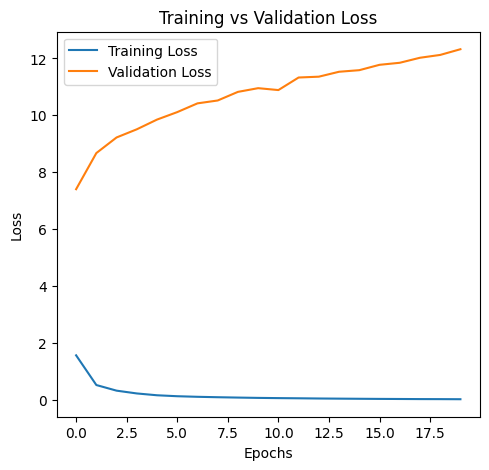

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()